# Train a ANN for the XOR problem and create a visualization that enables you to visualize the decision boudaries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Datos para entrenar XOR
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

In [32]:

x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

input_size=2
hidden_layer_size=2
output_layer_size=1


W_layer1 = tf.Variable(tf.random_uniform([input_size,hidden_layer_size], -1, 1), name="W_layer1") #weights
b_layer1 = tf.Variable(tf.zeros([hidden_layer_size]), name="b_layer1") #bias


W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1), name="W_layer2") #weights
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2") #bias

In [33]:

hidden = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
y = tf.nn.sigmoid(tf.matmul(hidden,W_layer2) + b_layer2)


lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #error cuadratico 

#Para optimizar la lossfn
learning_rate=.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(lossfn)

In [34]:

init = tf.global_variables_initializer()
sess = tf.Session()

In [42]:
epochs=50000
sess.run(init)
for i in range(epochs):
  sess.run(train_step, feed_dict={x: X, y_: Y}) #Corre sobre todos los datos 



In [43]:
correct_prediction = tf.equal(tf.round(y),y_) # Indican si la entrada en la prediccion fue correcta.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremo

1.0


1.48989 1.48866 -0.999173
0.422643 0.421268 -0.996747


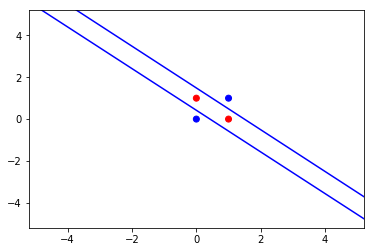

5.6969514

In [45]:
w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

m1=((w1[0]/w1[2]))/((-w1[0]/w1[1]))
print (-w1[0]/w1[1], -w1[0]/w1[2], m1)

w2=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[1]]+[i[1] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

m2=((w2[0]/w2[2]))/((-w2[0]/w2[1]))
print (-w2[0]/w2[1], -w2[0]/w2[2], m2)


plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w1[0]/w1[2]+m1*x2,color='blue')
plt.plot(x2,-w2[0]/w2[2]+m2*x2,color='blue')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])
plt.show()

sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]